In [5]:
# pytorch Framework
import torch
import torch.nn as NN
import torch.optim as Optim

# Useful Library
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import LabelEncoder

# Procedure Function
from tqdm.notebook import tqdm

# Extent Implicit Feedback Algorithm
from implicit import als

In [31]:
train_data = pd.read_csv('./sample_data/train_data.csv')

In [37]:
model = als.AlternatingLeastSquares(factors = 500, iterations = 10, regularization = 0.1, calculate_training_loss = True)

category_encoder = LabelEncoder()
category_encoder.fit(train_data['상품대분류'])

customer_encoder = LabelEncoder()
customer_encoder.fit(train_data['유저ID'])

train_data['상품대분류_코드'] = category_encoder.transform(train_data['상품대분류'])
train_data['회원_코드'] = customer_encoder.transform(train_data['유저ID'])

alpha = 40

user_category = sparse.csr_matrix((train_data['상품뷰횟수'].astype(float),(train_data['회원_코드'], train_data['상품대분류_코드'])))
category_user = sparse.csr_matrix((train_data['상품뷰횟수'].astype(float),(train_data['상품대분류_코드'], train_data['회원_코드']))) * alpha

model.fit(category_user.astype('double'))

In [41]:
non_missing_matrix = model.user_factors @ model.item_factors.T
non_missing_df = pd.DataFrame(non_missing_matrix)

non_missing_df = non_missing_df.reset_index()
non_missing_df['회원번호'] = customer_encoder.inverse_transform(non_missing_df['index'])
non_missing_df = non_missing_df.set_index('회원번호').drop('index', axis = 1)

non_missing_df.columns = category_encoder.inverse_transform(range(30))

In [42]:
non_missing_df

,가구/침구,건강식품,건강용품,공구,냉방/난방/욕실,문구/사무/파티,미술/공예/종교용품,생활가전,스포츠/레저,신발,...,자동차 용품,재해예방/방범/안전,조명/전기용품,주방용품,청소/생활잡화,캠핑,컨버전,컴퓨터/비디오게임,통신기기,패션잡화/보석
회원번호,,,,,,,,,,,,,,,,,,,,,
200010576707,0.046138,0.012536,-0.036564,-0.000089,0.016414,-0.001317,0.000700,0.009023,-0.037054,0.035161,...,0.001373,0.120162,-0.000384,-0.042982,-0.019127,-0.000187,-0.002229,0.000921,-0.001598,0.131826
200010586533,0.585289,0.503960,0.222030,0.005898,0.528262,0.012961,0.004621,0.970983,0.287575,0.989267,...,0.014941,0.565332,0.009072,0.981506,0.980368,0.083301,0.006164,0.030202,0.007084,0.961883
200010657400,0.135130,0.149023,0.082520,0.001076,0.148898,0.003052,0.001021,0.128972,0.088526,0.127813,...,0.005663,0.107184,0.002271,0.136619,0.146052,0.016875,0.002697,0.005418,0.001775,0.108273
200010659583,0.105595,0.074777,-0.014464,-0.000522,0.055693,-0.002959,0.001688,0.062490,-0.002485,0.146795,...,-0.004383,0.151413,-0.000444,-0.003982,0.045732,-0.008615,0.001120,-0.009977,-0.002351,0.174821
200010663821,0.461532,0.386932,0.060863,-0.009850,1.004117,-0.021196,-0.006983,0.988719,0.115885,1.006549,...,-0.037871,0.511141,-0.016137,0.223252,0.319255,-0.050471,-0.004928,-0.063478,-0.025338,0.544839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202007868892,0.197040,0.156343,0.057544,0.000851,0.187677,0.002169,0.001588,0.960783,0.071970,0.166844,...,0.006596,0.210318,0.001805,0.121372,0.127618,0.039225,-0.001439,0.016050,0.001062,0.230858
202007868897,0.152189,0.146256,0.091291,-0.000121,0.174757,0.000600,0.000665,0.977829,0.109230,0.125566,...,0.005390,0.089541,0.000999,0.166456,0.151148,0.039497,0.000413,0.015752,-0.000062,0.093641
202007868922,0.196929,0.156321,0.057591,0.000845,0.187651,0.002155,0.001587,0.960833,0.072042,0.166682,...,0.006589,0.210011,0.001799,0.121466,0.127685,0.039210,-0.001433,0.016043,0.001048,0.230466


In [107]:
ranking_matrix = 30 - non_missing_matrix.argsort().argsort()

ranking_df = pd.DataFrame(ranking_matrix)

ranking_df = ranking_df.reset_index()
ranking_df['회원번호'] = customer_encoder.inverse_transform(ranking_df['index'])
ranking_df = ranking_df.set_index('회원번호').drop('index', axis = 1)

ranking_df.columns = category_encoder.inverse_transform(range(30))

In [257]:
def precision_k(train_data, test_data, k, user_col, item_col, rank_col = 'rank'):
    """Derive Precision@K for the recommendation system
    
    Train, and test data has the stacked form, and the value is the ranking.
    The range of ranking is [1, N] and the ranking is descending order.
    
    Precision = Actual K / Recommend K
    Ex)
    | user_id | item_id | rank |
    |---------|---------|------|
    | 121000  |   012   |   3  |
    |  ....   |   ...   |  ... |    
    """
    train_data = train_data[(train_data[rank_col] <= k) & (train_data[user_col].isin(test_data[user_col]))]
    test_data = test_data[test_data[rank_col] <= k]
    
    precision = pd.merge(train_data, test_data, on = [user_col, item_col], how = 'left', suffixes = ('_train', '_test'))
    precision_gp = precision.groupby([user_col])

    precision_df = pd.DataFrame(
        data = [
            precision_gp[f'{rank_col}_test'].count(),
            precision_gp[f'{rank_col}_train'].count()
        ],
        index = [
            'actual_liked',
            'recommended'
        ]
    ).transpose().reset_index()
    precision_df['precision@k'] = precision_df['actual_liked'] / precision_df['recommended']
    
    return precision_df['precision@k'].mean()

def recall_k(train_data, test_data, k, user_col, item_col, rank_col = 'rank'):
    """Derive Precision@K for the recommendation system
    
    Train, and test data has the stacked form, and the value is the ranking.
    The range of ranking is [1, N] and the ranking is descending order.
    
    Recall = Recommend K / Actual K
    Ex)
    | user_id | item_id | rank |
    |---------|---------|------|
    | 121000  |   012   |   3  |
    |  ....   |   ...   |  ... |    
    """
    train_data = train_data[(train_data[rank_col] <= k) & (train_data[user_col].isin(test_data[user_col]))]
    test_data = test_data[(test_data[rank_col] <= k) & (test_data[user_col].isin(train_data[user_col]))]
    
    recall = pd.merge(test_data, train_data, on = [user_col, item_col], how = 'left', suffixes = ('_test', '_train'))
    recall_gp = recall.groupby([user_col])

    recall_df = pd.DataFrame(
        data = [
            recall_gp[f'{rank_col}_test'].count(),
            recall_gp[f'{rank_col}_train'].count()
        ],
        index = [
            'actual_liked',
            'recommended'
        ]
    ).transpose().reset_index()
    recall_df['recall@k'] = recall_df['recommended'] / recall_df['actual_liked']
    
    return recall_df['recall@k'].mean()

def expected_rank_percentile(train_data, test_data, user_col, item_col, rank_col = 'rank'):
    """Derive ERP for the recommendation system.
    The measurement is from "Hu, Koren, Volinsky (2008)"
    
    Train, and test data has the stacked form, and the value is the ranking.
    The range of ranking is [1, N] and the ranking is descending order.
    
    Ex)
    | user_id | item_id | rank |
    |---------|---------|------|
    | 121000  |   012   |   3  |
    |  ....   |   ...   |  ... |  
    """
    train_data = train_data[train_data[user_col].isin(test_data[user_col])]
    test_data = test_data[test_data[user_col].isin(train_data[user_col])]
    
    valid_df = pd.merge(train_data, test_data, on = [user_col, item_col], how = 'left', suffixes = ('_train', '_test'))
    valid_df['rank_percentile'] = (valid_df[f'{rank_col}_train'] - 1) / valid_df[f'{rank_col}_train'].max() * 100
    return valid_df[~pd.isna(valid_df[f'{rank_col}_test'])]['rank_percentile'].mean()

def average_relative_position(train_data, test_data, user_col, item_col, rank_col = 'rank'):
    """Derive ARP for the recommendation system.
    The measurement is from "Fast ALS-based Matrix Factorization for Explicit and Implicit Feedback Datasets"
    
    Train, and test data has the stacked form, and the value is the ranking.
    The range of ranking is [1, N] and the ranking is descending order.
    
    Ex)
    | user_id | item_id | rank |
    |---------|---------|------|
    | 121000  |   012   |   3  |
    |  ....   |   ...   |  ... |
    """
    train_data = train_data[train_data[user_col].isin(test_data[user_col])]
    test_data = test_data[test_data[user_col].isin(train_data[user_col])]
    
    valid_df = pd.merge(train_data, test_data, on = [user_col, item_col], how = 'left', suffixes = ('_train', '_test'))

    valid_df = valid_df.sort_values([f'{user_col}', f'{rank_col}_train'])

    valid_df['implicit_exist'] = ~pd.isna(valid_df[f'{rank_col}_test']) * 1

    valid_df['cum_exist'] = valid_df.groupby(user_col)['implicit_exist'].cumsum()

    valid_df['revealed_item'] = valid_df.groupby(user_col)[f'{rank_col}_test'].transform(func = 'count')

    valid_df['relative_position'] = valid_df['rank_train'] - valid_df['cum_exist']
    valid_df['relative_position'] = valid_df['relative_position'] / (valid_df[f'{rank_col}_train'].max() - valid_df['revealed_item']) * 100

    revealed_df = valid_df[valid_df['implicit_exist'] == 1]

    return revealed_df['relative_position'].mean()

In [129]:
train_df = pd.DataFrame(ranking_df.stack(), columns = ['rank']).reset_index().rename(columns = {'level_1': '상품대분류', '회원번호': '유저ID'})

In [130]:
test_data = pd.read_csv('./sample_data/test_data.csv')

In [133]:
test_data['rank'] = test_data.groupby(['유저ID']).rank(ascending = False)

In [204]:
precision_list = [
    precision_k(train_df, test_data, user_col = '유저ID', item_col = '상품대분류', k = k) for k in range(1, 30)
]

In [205]:
recall_list = [
    recall_k(train_df, test_data, user_col = '유저ID', item_col = '상품대분류', k = k) for k in range(1, 30)
]

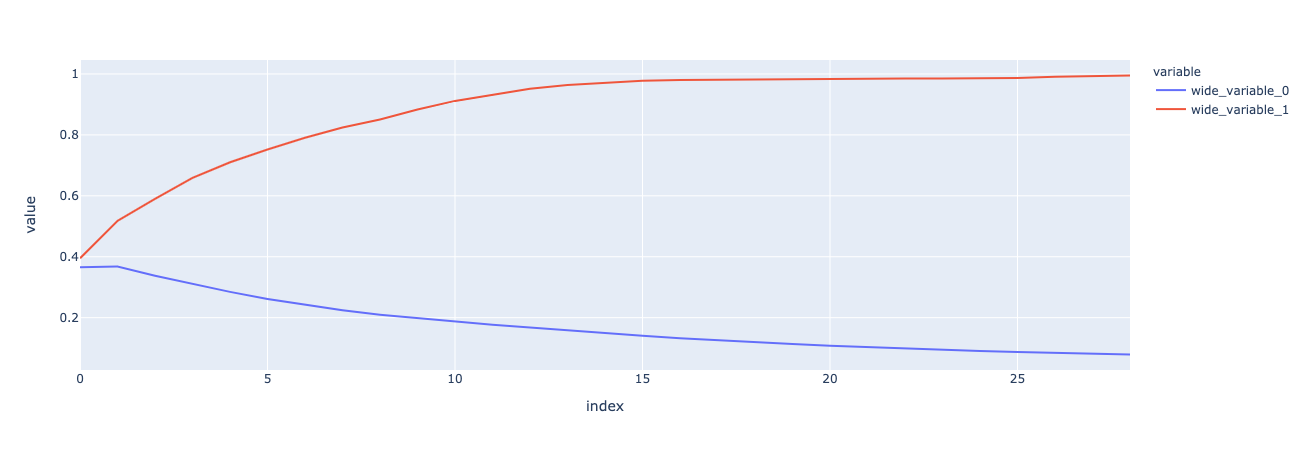

In [206]:
import plotly.express as px

px.line(y = [precision_list, recall_list])

In [258]:
expected_rank_percentile(train_df, test_data, user_col = '유저ID', item_col = '상품대분류')

14.307313990301529

In [255]:
average_relative_position(train_df, test_data, user_col = '유저ID', item_col = '상품대분류')

11.15269806699413